In [1]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 72)

In [28]:
n = 1000
std = 1.0

b1 = np.random.normal(0, std, size = n)
b2 = np.cumsum(np.cumsum(b1))

In [29]:
np.std(b1)

1.0002782530649315

In [30]:
np.std(b2)

10549.025738961194

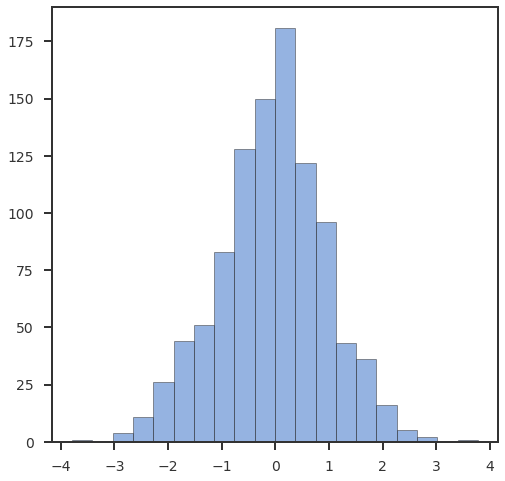

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(b1, alpha = 0.5)
#ax1.hist(b2, alpha = 0.5)
plt.show()

In [61]:
from gradvi.tests import toy_data
from gradvi.models import basis_matrix as gvbm

n = 8192
x = np.linspace(0, 1, n)
degree = 0
H = gvbm.trendfiltering(n, degree)
Hstd = np.sqrt(np.sum(np.square(H)) / n)

np.random.seed(102)

nknots  = 800
strue = 0.1
knots = np.linspace(0, 1, nknots+2)[1:-1]

data = dict()

bstd = 0.5
btrue = np.random.normal(0, bstd, size = nknots + degree)
bfix = np.cumsum(btrue)
data = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                    #signal = "normal", seed = 100,
                    signal = "fixed", bfix = bfix,
                    include_intercept = False)

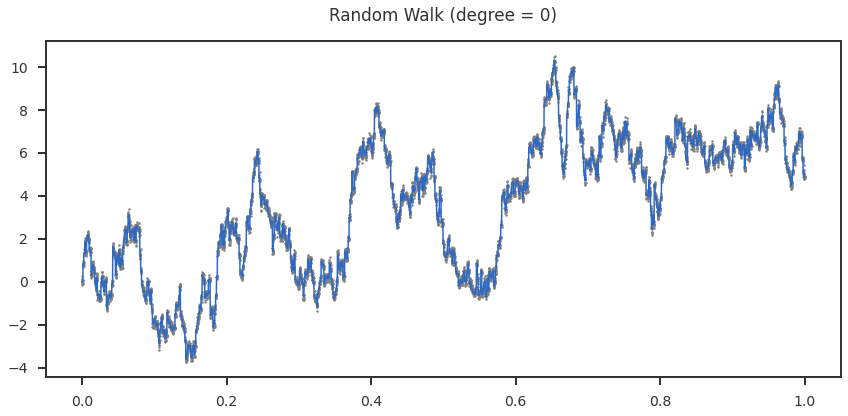

In [69]:
fig = plt.figure(figsize = (12, 6))

ax = fig.add_subplot(1, 1, 1)
ax.scatter(data.x, data.y, s = 2, color = 'gray')
ax.plot(data.x, data.ytrue)
#ax.plot(data[d].x, gvma.moving_average(data[d].y))
ax.set_title(f"Random Walk (degree = {degree})", pad = 20)

    
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
# utils.saveplot(fig, 'trendfiltering_simple_examples')
plt.show()

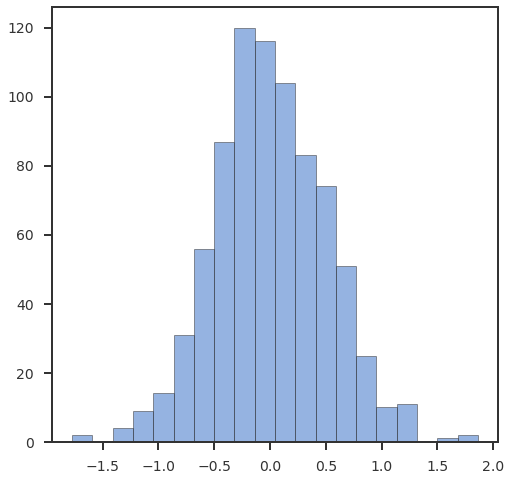

In [70]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(data.btrue[np.where(data.btrue != 0)], alpha = 0.5)
plt.show()